In [2]:
import  numpy as np
import json
with open("../artifacts/kaggle.json"
          ,'r') as file:
         data = json.load(file)


In [3]:
data


{'username': 'anujayavidmal', 'key': 'd2f9a71814e37041a278029f305737d1'}

In [4]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade pip


In [11]:
import os
os.environ['KAGGLE_USRNAME'] = data["username"]
os.environ['KAGGLE_Key'] = data ['username']

In [12]:
import os
os.environ['KAGGLE_USRNAME'] = data["username"]
os.environ['KAGGLE_Key'] = data ['key']

In [17]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize Kaggle API
api = KaggleApi()

# Specify the path to your kaggle.json file
api.set_config_file(config_file="C:/Users/DELL/Desktop/sentimental_analysis_project/artifacts/kaggle.json")

# Authenticate using kaggle.json file
api.authenticate()

# Now you should be authenticated and ready to use the Kaggle API


AttributeError: 'KaggleApi' object has no attribute 'set_config_file'

In [18]:
import json
import os

# Adjust the path to where your kaggle.json file is located
with open("C:/Users/DELL/Desktop/sentimental_analysis_project/artifacts/kaggle.json", 'r') as file:
    data = json.load(file)

os.environ['KAGGLE_USERNAME'] = data["username"]
os.environ['KAGGLE_KEY'] = data['key']



In [19]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()


In [20]:
api.dataset_download_files("dineshpiyasamara/sentiment-analysis-dataset",path ='../artifacts/')

Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/sentiment-analysis-dataset


In [21]:
import zipfile
with zipfile.Zipfile("../artifacts/sentimental-analysis-dataset.zip",'r') as zip_ref:
                    zip_ref.extractall("../artifacts/")

AttributeError: module 'zipfile' has no attribute 'Zipfile'

In [22]:
import zipfile

# Specify the path to your zip file
zip_file_path = "../artifacts/sentimental-analysis-dataset.zip"

# Open and extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("../artifacts/")


FileNotFoundError: [Errno 2] No such file or directory: '../artifacts/sentimental-analysis-dataset.zip'

In [23]:
import zipfile

# Define the absolute path to the zip file and the extraction directory
zip_file_path = "C:/Users/DELL/Desktop/sentimental_analysis_project/artifacts/sentimental-analysis-dataset.zip"
extraction_path = "C:/Users/DELL/Desktop/sentimental_analysis_project/artifacts/"

# Open and extract the zip file
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)
    print(f"Extracted {zip_file_path} to {extraction_path}")
except FileNotFoundError:
    print(f"File {zip_file_path} not found.")
except zipfile.BadZipFile:
    print(f"The file {zip_file_path} is not a zip file or it is corrupted.")
except Exception as e:
    print(f"An error occurred: {e}")


File C:/Users/DELL/Desktop/sentimental_analysis_project/artifacts/sentimental-analysis-dataset.zip not found.


In [24]:
import zipfile

# Specify the path to your zip file
zip_file_path = "../artifacts/sentiment-analysis-dataset.zip"

# Open and extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("../artifacts/")
import pandas as pd


In [25]:
data = pd.read_csv("../artifacts/sentiment_analysis.csv")

In [26]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [27]:
data.shape

(7920, 3)

In [28]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [29]:
data.duplicated().sum()

np.int64(0)

In [30]:
data.isnull

<bound method DataFrame.isnull of         id  label                                              tweet
0        1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1        2      0  Finally a transparant silicon case ^^ Thanks t...
2        3      0  We love this! Would you go? #talk #makememorie...
3        4      0  I'm wired I know I'm George I was made that wa...
4        5      1  What amazing service! Apple won't even talk to...
...    ...    ...                                                ...
7915  7916      0  Live out loud #lol #liveoutloud #selfie #smile...
7916  7917      0  We would like to wish you an amazing day! Make...
7917  7918      0  Helping my lovely 90 year old neighbor with he...
7918  7919      0  Finally got my #smart #pocket #wifi stay conne...
7919  7920      0  Apple Barcelona!!! #Apple #Store #BCN #Barcelo...

[7920 rows x 3 columns]>

In [31]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### text prepocessing

In [32]:
import re
import string

In [33]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


### convert lowercase to uppercase

In [34]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [35]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [36]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [37]:
data.head(15)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...
5,6,1,iphone software update fucked up my phone big ...
6,7,0,happy for us .. #instapic #instadaily #us #son...
7,8,0,new type c charger cable #uk http://www.ebay.c...
8,9,0,bout to go shopping again listening to music #...
9,10,0,photo: #fun #selfie #pool #water #sony #camera...


In [38]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'https?:\/\/.*[\r\n]*', ' ', x, flags =re.MULTILINE) for x in x.split()))


In [39]:
data["tweet"].head()

0    #fingerprint #pregnancy test   #android #apps ...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [40]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### remove punctuation

In [41]:
def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,' ')
    return text
data["tweet"] =data["tweet"].apply(remove_punctuation)


In [42]:
data["tweet"].head()

0     fingerprint  pregnancy test    android  apps ...
1    finally a transparant silicon case    thanks t...
2    we love this  would you go   talk  makememorie...
3    i m wired i know i m george i was made that wa...
4    what amazing service  apple won t even talk to...
Name: tweet, dtype: object

### remove numbers

In [43]:
data["tweet"]=data["tweet"].str.replace('\d+','',regex = True)

In [44]:
data["tweet"].head()

0     fingerprint  pregnancy test    android  apps ...
1    finally a transparant silicon case    thanks t...
2    we love this  would you go   talk  makememorie...
3    i m wired i know i m george i was made that wa...
4    what amazing service  apple won t even talk to...
Name: tweet, dtype: object

### remove  stopwords

In [45]:
import nltk

In [46]:
!pip install nltk

In [47]:
import nltk

In [48]:
nltk.download("stopwords",download_dir = "../static/model/")

[nltk_data] Downloading package stopwords to ../static/model/...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [49]:
with open("../static/model/corpora/stopwords/english",'r') as file:
          sw= file.read().splitlines()

In [50]:
sw


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [51]:
data ["tweet"]=data ["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [52]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    wired know george made way iphone cute daventr...
4    amazing service apple even talk question unles...
Name: tweet, dtype: object

### stemming

In [53]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()


In [54]:
data["tweet"] = data ["tweet"].apply(lambda x: ' '.join(ps.stem(x) for x in x.split()))

In [55]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,wire know georg made way iphon cute daventri home
4,5,1,amaz servic appl even talk question unless pay...


In [56]:
data["tweet"]

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       wire know georg made way iphon cute daventri home
4       amaz servic appl even talk question unless pay...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [57]:
import matplotlib.pyplot as plt

In [58]:
from collections import Counter
vocab = Counter()

In [59]:
vocab

Counter()

In [62]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())


In [63]:
vocab

Counter({'iphon': 4103,
         'appl': 2909,
         'samsung': 1407,
         'new': 1145,
         'twitter': 1114,
         'com': 1044,
         'phone': 1033,
         'follow': 890,
         'soni': 821,
         '…': 775,
         'ipad': 540,
         'rt': 534,
         'pic': 523,
         'love': 503,
         'like': 457,
         'day': 435,
         'android': 420,
         'app': 419,
         'life': 416,
         'photo': 394,
         'io': 390,
         'get': 383,
         'galaxi': 367,
         'instagram': 360,
         'case': 352,
         'cute': 324,
         'beauti': 323,
         'work': 313,
         'gain': 312,
         'today': 311,
         'back': 298,
         'happi': 296,
         'fuck': 294,
         'photographi': 294,
         'game': 285,
         'got': 281,
         'fun': 277,
         'thank': 267,
         'news': 266,
         'music': 265,
         'time': 253,
         'make': 247,
         'updat': 241,
         'smile': 232,
    

In [64]:
len(vocab)

15863

In [65]:
data


,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,wire know georg made way iphon cute daventri home
4,5,1,amaz servic appl even talk question unless pay...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [67]:
tokens = [key for key in vocab if vocab[key]>10]


In [68]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'pic',
 'twitter',
 'com',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'i

In [69]:
len(tokens)

1166

In [70]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,wire know georg made way iphon cute daventri home
4,5,1,amaz servic appl even talk question unless pay...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [71]:
def save_vocab(lines,filename):
    data = "\n".join(lines)
    file = open(filename,"w",encoding = "utf-8")
    file.write(data)
    file.close()
save_vocab(tokens,"../static/model/vocabulary.txt")

### Divide data set

In [72]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,wire know georg made way iphon cute daventri home
4,5,1,amaz servic appl even talk question unless pay...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [73]:
X = data["tweet"]
y = data["label"]

In [74]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       wire know georg made way iphon cute daventri home
4       amaz servic appl even talk question unless pay...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [75]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

In [80]:
!pip install scikit-learn

In [85]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

In [86]:
X_train.shape

(6336,)

In [87]:
X_test

2362        restor phone everyth got delet fml somad appl
737     n bridesmaid white wed iphon instagram bride b...
4061    want refund psndown playstationnetwork soni ps...
367     funni stori pick appl laughter laugh smile app...
5523    sweet billi sent bestfriend iphon case heart b...
                              ...                        
2437    suithorn followsunday followback rt teamfollow...
947            appl lieee fake appl michael hungri fatlif
3307                       nadin griffin phone alway life
4516    gain follow rt must follow follow back follow ...
7759    appl map suck googl wouldnt releas nativ io ma...
Name: tweet, Length: 1584, dtype: object

In [94]:
X_train

7693            hope get new iphon tomm smh blame club ll
2427    phone die freakin kid appl seven percent hatei...
5295    samsung tablet spin arriv prize expens pretti ...
3996    race industri anti corruption… news photograph...
4122    nightpic portrait shoot shoot tfp tfpmodel tfp...
                              ...                        
2716     fuck appl bring stupid ipadmini still shitti map
6970    look innoc cat instamood sad instadaili anim s...
5800    would like wish amaz day make everi minut coun...
3852    samsung galaxi note catch fire aircraft chenna...
5409         wish drive sleep dog jam sleepingdog ps soni
Name: tweet, Length: 6336, dtype: object

In [88]:
y_train

7693    0
2427    0
5295    0
3996    0
4122    0
       ..
2716    1
6970    0
5800    0
3852    1
5409    0
Name: label, Length: 6336, dtype: int64

In [89]:
y_test

2362    1
737     0
4061    1
367     0
5523    0
       ..
2437    0
947     1
3307    0
4516    0
7759    1
Name: label, Length: 1584, dtype: int64

### Vectorization

In [92]:
def vectorization(ds,vocabulary):
    vectorized_lst=[]
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] =1
        vectorized_lst.append(sentence_lst)
    vectorized_lst_new = np.asarray(vectorized_lst,dtype = np.float32)
    return vectorized_lst_new

In [97]:
vectorized_X_train = vectorization(X_train,tokens)

In [98]:
vectorized_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [99]:
vectorized_X_test = vectorization(X_test,tokens)

In [100]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [101]:
y_train.value_counts()

label
0    4708
1    1628
Name: count, dtype: int64

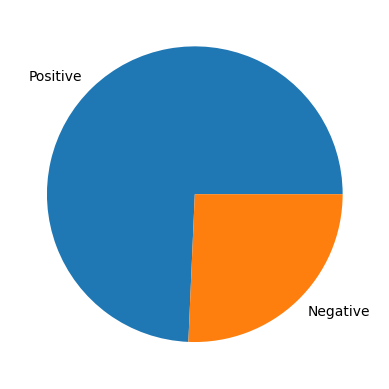

In [106]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels= ["Positive","Negative"])
plt.show()

### Handling imbalanced data set

In [111]:
!pip install imblearn

In [114]:
!pip install imbalanced-learn

In [115]:

from imblearn.over_sampling import SMOTE
smote =SMOTE()
vectorized_X__train_smote,y_train_smote = smote.fit_resample(vectorized_X_train,y_train)
print(vectorized_X__train_smote.shape,y_train_smote.shape)

(9416, 1166) (9416,)


In [117]:
y_train_smote.value_counts()

label
0    4708
1    4708
Name: count, dtype: int64

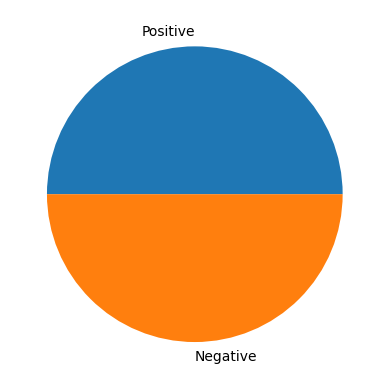

In [118]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels= ["Positive","Negative"])
plt.show()

In [119]:
vectorized_X__train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [120]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9411    1
9412    1
9413    1
9414    1
9415    1
Name: label, Length: 9416, dtype: int64

In [121]:
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [122]:
y_test

2362    1
737     0
4061    1
367     0
5523    0
       ..
2437    0
947     1
3307    0
4516    0
7759    1
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluation

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [127]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## Logistic regression

In [139]:
lr  = LogisticRegression()
lr.fit(vectorized_X__train_smote,y_train_smote)
y_train_pred = lr.predict(vectorized_X__train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = lr.predict(vectorized_X_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.943
	Precision = 0.922
	Recall = 0.969
	F1-Score = 0.945
Testing Scores:
	Accuracy = 0.867
	Precision = 0.696
	Recall = 0.839
	F1-Score = 0.761


## Naive Bayes

In [140]:
nb  = MultinomialNB()
nb.fit(vectorized_X__train_smote,y_train_smote)
y_train_pred = lr.predict(vectorized_X__train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = lr.predict(vectorized_X_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.943
	Precision = 0.922
	Recall = 0.969
	F1-Score = 0.945
Testing Scores:
	Accuracy = 0.867
	Precision = 0.696
	Recall = 0.839
	F1-Score = 0.761


## Decision tree

In [141]:
dt  = DecisionTreeClassifier()
dt.fit(vectorized_X__train_smote,y_train_smote)
y_train_pred = lr.predict(vectorized_X__train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = lr.predict(vectorized_X_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.943
	Precision = 0.922
	Recall = 0.969
	F1-Score = 0.945
Testing Scores:
	Accuracy = 0.867
	Precision = 0.696
	Recall = 0.839
	F1-Score = 0.761


## Random Forest

In [142]:
rf  = RandomForestClassifier()
rf.fit(vectorized_X__train_smote,y_train_smote)
y_train_pred = lr.predict(vectorized_X__train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = lr.predict(vectorized_X_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.943
	Precision = 0.922
	Recall = 0.969
	F1-Score = 0.945
Testing Scores:
	Accuracy = 0.867
	Precision = 0.696
	Recall = 0.839
	F1-Score = 0.761


## Support Vector Machine

In [143]:
svm  = SVC()
svm.fit(vectorized_X__train_smote,y_train_smote)
y_train_pred = lr.predict(vectorized_X__train_smote)
training_scores(y_train_smote,y_train_pred)
y_test_pred = lr.predict(vectorized_X_test)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.943
	Precision = 0.922
	Recall = 0.969
	F1-Score = 0.945
Testing Scores:
	Accuracy = 0.867
	Precision = 0.696
	Recall = 0.839
	F1-Score = 0.761


In [145]:
import pickle
with open("../static/model/model.pickle","wb") as file:
    pickle.dumb(lr,file)

AttributeError: module 'pickle' has no attribute 'dumb'